In [3]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import re
import csv
import os

In [19]:
df = pd.read_csv('/gpfs/gsfs1/scr/mjpantho/Pantho_differential_fitness/Fred_hucchinson_estimate/ga_output.csv')
print(df.head())

  location model  pivot_date variant        date  median_ga  ga_upper_80  \
0      USA  GARW  2022-04-15   Delta  2022-01-02   0.660984     0.692995   
1      USA  GARW  2022-04-15   Delta  2022-01-03   0.657665     0.688265   
2      USA  GARW  2022-04-15   Delta  2022-01-04   0.654544     0.684484   
3      USA  GARW  2022-04-15   Delta  2022-01-05   0.651721     0.680517   
4      USA  GARW  2022-04-15   Delta  2022-01-06   0.649568     0.677821   

   ga_lower_80  
0     0.626749  
1     0.626395  
2     0.625774  
3     0.624449  
4     0.623709  


In [20]:
'''
Ba.1 = 21k
BA.2 = 21L
BA.4 = 22A
BA.5 = 22B
BA.2.12.1 = 22C
'''

# Grouping by 'location' and 'model', then calculating the mean of 'median_ga' for each group
grouped_df = df.groupby(['location', 'model', 'variant'])['median_ga'].mean().reset_index()

# Displaying the grouped DataFrame
print(grouped_df)

          location model      variant  median_ga
0            Japan   FGA        Delta   0.359985
1            Japan   FGA  Omicron 21K   0.966657
2            Japan   FGA  Omicron 21L   1.348491
3            Japan  GARW        Delta   0.526527
4            Japan  GARW  Omicron 21K   0.795742
5            Japan  GARW  Omicron 21L   1.485532
6            Japan   MLR        Delta   0.370944
7            Japan   MLR  Omicron 21K   0.678872
8            Japan   MLR  Omicron 21L   1.001984
9              USA   FGA        Delta   0.630360
10             USA   FGA  Omicron 21K   0.733193
11             USA   FGA  Omicron 21L   1.093399
12             USA   FGA  Omicron 22A   1.579665
13             USA   FGA  Omicron 22B   1.403545
14             USA   FGA  Omicron 22C   1.423170
15             USA  GARW        Delta   0.663260
16             USA  GARW  Omicron 21K   0.748939
17             USA  GARW  Omicron 21L   1.080451
18             USA  GARW  Omicron 22A   1.445841
19             USA  

In [27]:
# Mapping of old variants to new names
variant_replacements = {
    'Omicron 21K': 'BA.1',
    'Omicron 21L': 'BA.2',
    'Omicron 22A': 'BA.4',
    'Omicron 22B': 'BA.5',
    'Omicron 22C' : 'BA.2.12.1',
}

# Replacing variant names
grouped_df['variant'] = grouped_df['variant'].replace(variant_replacements, regex=True)

# Displaying the modified DataFrame
print(grouped_df.head())

  location model variant  median_ga             group
0    Japan   FGA   Delta   0.359985   Japan FGA Delta
1    Japan   FGA    BA.1   0.966657    Japan FGA BA.1
2    Japan   FGA    BA.2   1.348491    Japan FGA BA.2
3    Japan  GARW   Delta   0.526527  Japan GARW Delta
4    Japan  GARW    BA.1   0.795742   Japan GARW BA.1


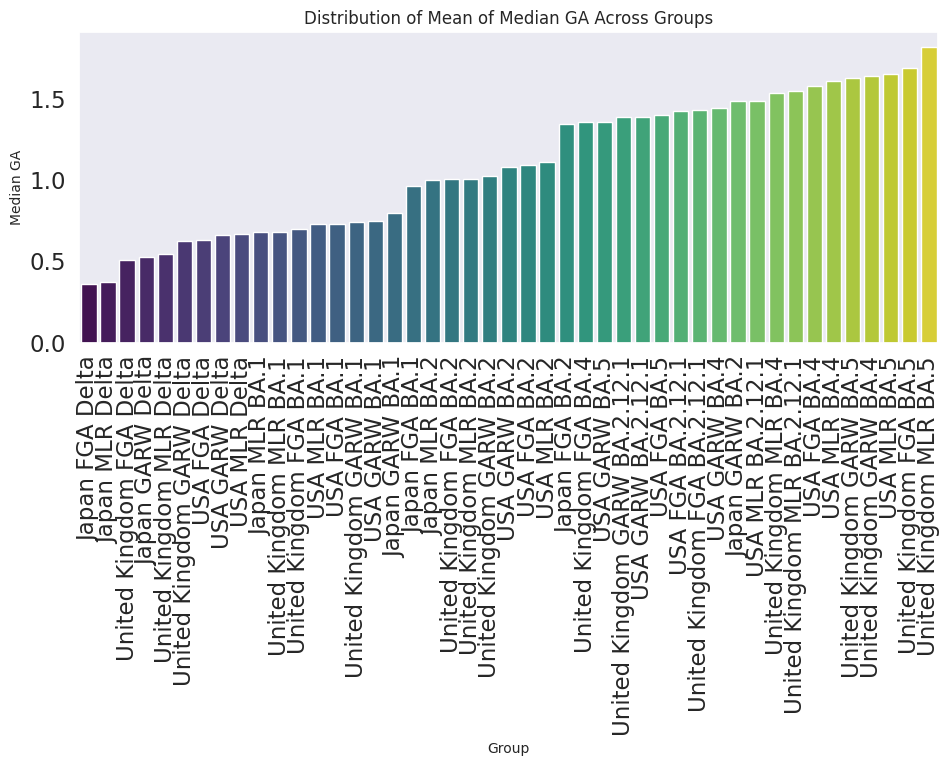

In [28]:
# Creating a unique identifier for each combination of location, model, and variant
grouped_df['group'] = grouped_df['location'] + ' ' + grouped_df['model'] + ' ' + grouped_df['variant']

# Let's pretend the 'median_ga' is the metric we're interested in, analogous to 'Slope'
# Sorting the DataFrame by 'median_ga' in ascending order
df_sorted = grouped_df.sort_values('median_ga', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(df_sorted))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='group', y='median_ga', data=df_sorted, palette=color_palette)
plt.xlabel('Group', fontsize=10)
plt.ylabel('Median GA', fontsize=10)
plt.title('Distribution of Mean of Median GA Across Groups', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Show the plot
plt.show()

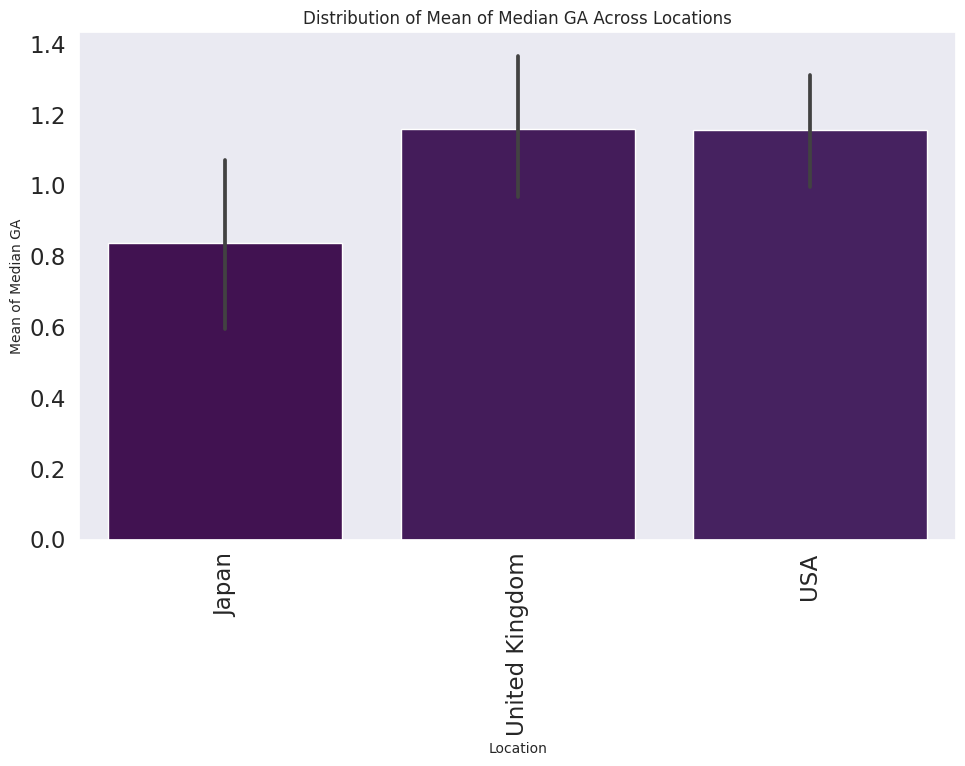

In [29]:
# Creating a unique identifier for each combination of location, model, and variant
# grouped_df['group'] = grouped_df['location'] + ' ' + grouped_df['model'] + ' ' + grouped_df['variant']

# Let's pretend the 'median_ga' is the metric we're interested in, analogous to 'Slope'
# Sorting the DataFrame by 'median_ga' in ascending order
df_sorted = grouped_df.sort_values('median_ga', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(df_sorted))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='location', y='median_ga', data=df_sorted, palette=color_palette)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Mean of Median GA', fontsize=10)
plt.title('Distribution of Mean of Median GA Across Locations', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Show the plot
plt.show()

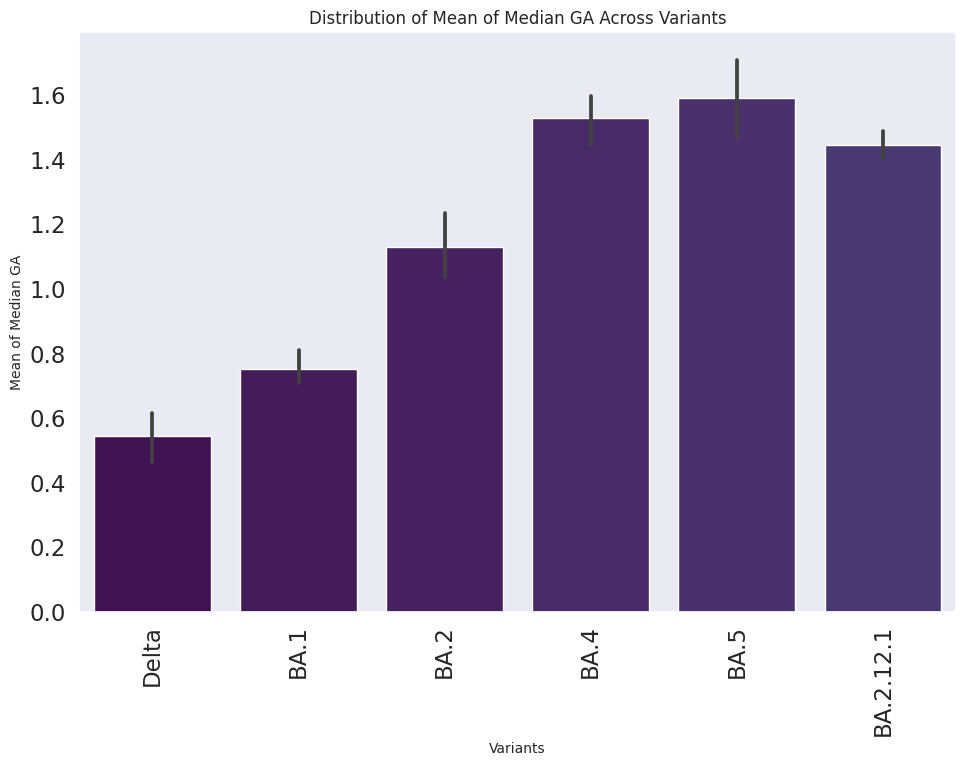

In [30]:
# Sorting the DataFrame by 'median_ga' in ascending order
df_sorted = grouped_df.sort_values('median_ga', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(df_sorted))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='variant', y='median_ga', data=df_sorted, palette=color_palette)
plt.xlabel('Variants', fontsize=10)
plt.ylabel('Mean of Median GA', fontsize=10)
plt.title('Distribution of Mean of Median GA Across Variants', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Show the plot
plt.show()

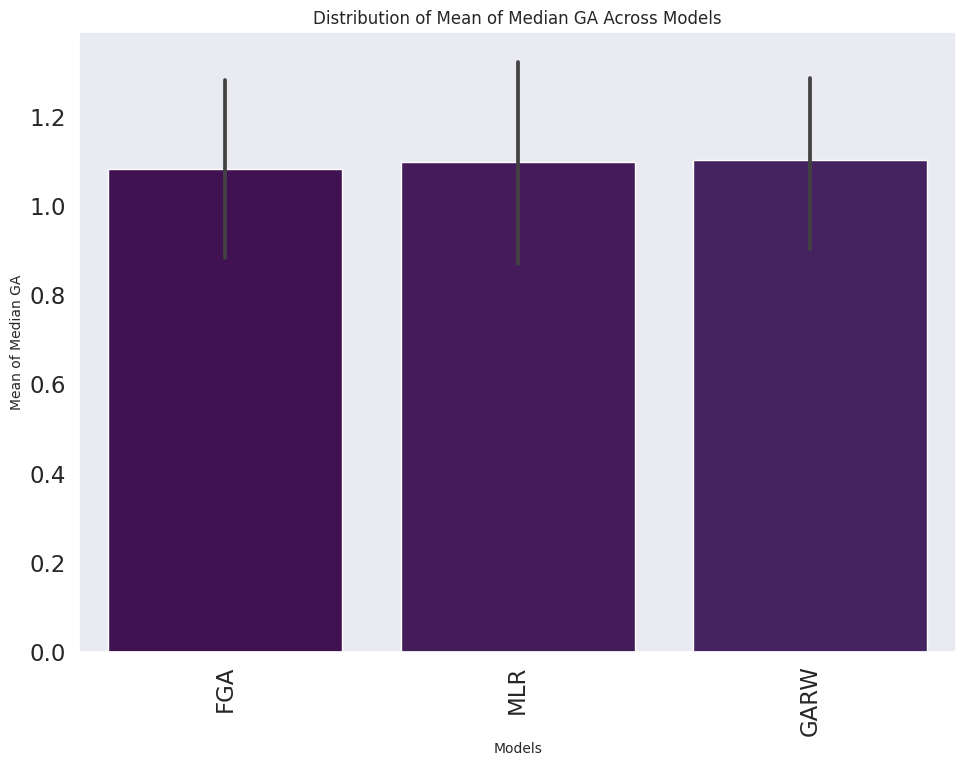

In [31]:
# Sorting the DataFrame by 'median_ga' in ascending order
df_sorted = grouped_df.sort_values('median_ga', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(df_sorted))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(10, 8))
sns.barplot(x='model', y='median_ga', data=df_sorted, palette=color_palette)
plt.xlabel('Models', fontsize=10)
plt.ylabel('Mean of Median GA', fontsize=10)
plt.title('Distribution of Mean of Median GA Across Models', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Show the plot
plt.show()

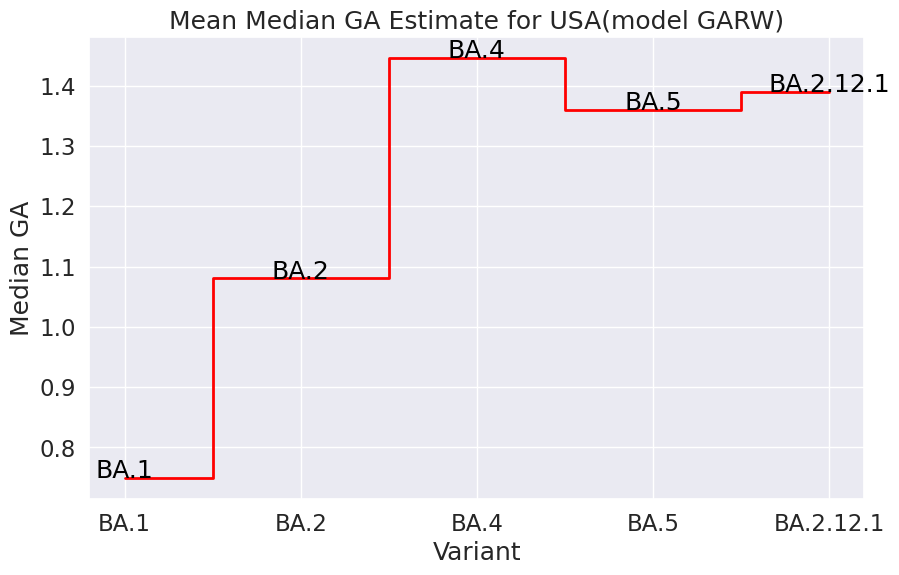

In [40]:
# Filter for the USA location and BA variants
location = 'USA'
model = ['FGA', 'MLR', 'GARW']
df_usa_ba = grouped_df[(grouped_df['location'] == 'USA') & 
                       (grouped_df['variant'].str.contains('BA')) & 
                       (grouped_df['model'] == model[2])]

# Sort by variant to maintain the order BA.1, BA.2, BA.4, BA.5
sort_order = {'BA.1': 0, 'BA.2': 1, 'BA.4': 2, 'BA.5': 3}
df_usa_ba['sort_key'] = df_usa_ba['variant'].map(sort_order)
df_usa_ba_sorted = df_usa_ba.sort_values('sort_key')

# Create the step plot
plt.figure(figsize=(10, 6))
plt.step(df_usa_ba_sorted['variant'], df_usa_ba_sorted['median_ga'], where='mid', color='red', linewidth=2)
plt.xlabel('Variant')
plt.ylabel('Median GA')
plt.title(f'Mean Median GA Estimate for {location}(model {model[2]})')

# Adding the variant text on the plot
for i, row in df_usa_ba_sorted.iterrows():
    plt.text(row['variant'], row['median_ga'], row['variant'], color='black', ha='center')

plt.show()

In [41]:
# # Filter for the location and select the 'variant' and 'median_ga' for the plot
# location = 'USA'
# model = 'GARW' # This should match one of the locations in your DataFrame
# plot_data = grouped_df[grouped_df['location'] == location & grouped_df['model'] == model][['variant', 'median_ga']].set_index('variant')
# print(plot_data)
# # Create a step plot
# plt.figure(figsize=(3, 3))  # Set figure size to 3 by 3
# plt.step(plot_data.index, plot_data['median_ga'], linewidth=1.5, color='red')

# # Add labels and title
# plt.ylabel('Fitness Value', fontsize=12)
# plt.title(f'Progressive fitness growth of Omicron Sub-lineages\n Location: {location}', fontsize=8)

# # Set the background color to white
# plt.gca().set_facecolor('white')

# # Add axis lines
# plt.axhline(0, color='black', linewidth=0.5)
# plt.axvline(-0.1, color='black', linewidth=0.5)

# # Hide x-axis labels
# plt.xticks([])
# plt.yticks()

# # Display the labels on the graph
# categories = plot_data.index
# values = plot_data['median_ga'].tolist()
# for i, (category, value) in enumerate(zip(categories, values)):
#     plt.text(i, value, category, ha='left', va='bottom')
# plt.show()